In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./cleaned_hotel_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18307 entries, 0 to 18306
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cleaned_Review  18307 non-null  object
 1   Sentiment       18307 non-null  object
dtypes: object(2)
memory usage: 286.2+ KB


In [3]:
# Split Feautures and Labels
X = df['Cleaned_Review'] # text
y = df['Sentiment'] # label: positive or negative

In [4]:
# Split data with into train and test stratification to preserve class balance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [5]:
# Vectorize Text with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
# Train the models

## Logistic Regression (with class_weight to handle imbalance)
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train_vec, y_train)
lr_preds = lr_model.predict(X_test_vec)

In [7]:
## Naive Bayes

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_preds = nb_model.predict(X_test_vec)

In [8]:
# Evaluate the models
from sklearn.metrics import classification_report

print("Logistic Regression Report:")
print(classification_report(y_test, lr_preds))



print("Naive Bayes Report:")
print(classification_report(y_test, nb_preds))


Logistic Regression Report:
              precision    recall  f1-score   support

    negative       0.82      0.93      0.87       643
    positive       0.99      0.96      0.97      3019

    accuracy                           0.95      3662
   macro avg       0.90      0.94      0.92      3662
weighted avg       0.96      0.95      0.95      3662

Naive Bayes Report:
              precision    recall  f1-score   support

    negative       0.95      0.58      0.72       643
    positive       0.92      0.99      0.95      3019

    accuracy                           0.92      3662
   macro avg       0.93      0.78      0.84      3662
weighted avg       0.92      0.92      0.91      3662



In [9]:
# Visualize Confusion Matrices

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Confusion Matrices
lr_cm = confusion_matrix(y_test, lr_preds, labels=["positive", "negative"])
nb_cm = confusion_matrix(y_test, nb_preds, labels=["positive", "negative"])

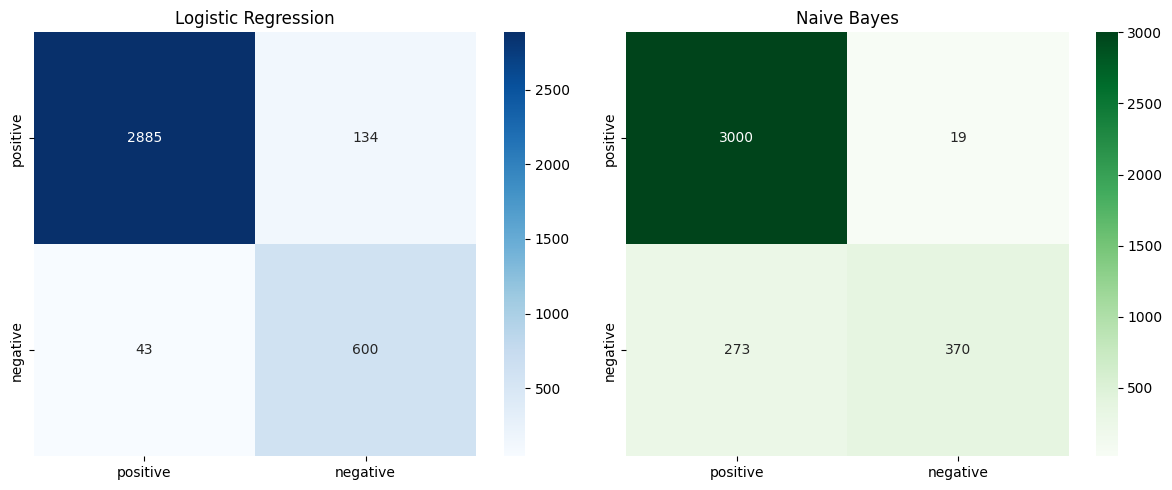

In [10]:
# Plot Matrices
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['positive', 'negative'],
            yticklabels=['positive', 'negative'])
axes[0].set_title('Logistic Regression')

sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['positive', 'negative'],
            yticklabels=['positive', 'negative'])
axes[1].set_title('Naive Bayes')

plt.tight_layout()
plt.show()